In [1]:
#Step 1: Import Required Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

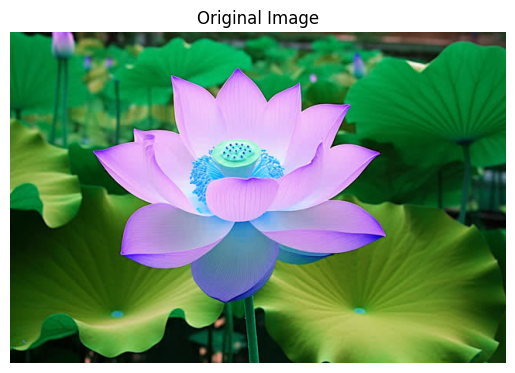

In [5]:
#Step 2: Load Image

img = cv2.imread("/content/drive/MyDrive/IPCV/LAB_3/lotus.jpg")

# Display Image
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')
plt.show()

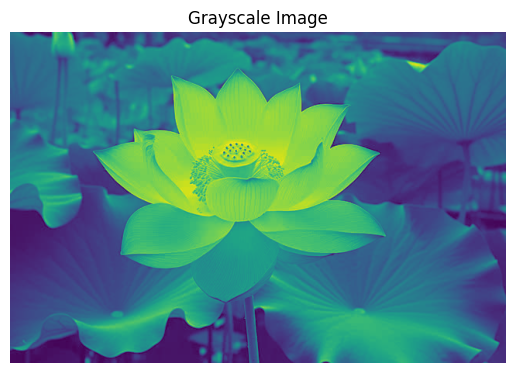

In [9]:
import cv2
# 1. Read the grayscale image into a variable img
img = cv2.imread("/content/drive/MyDrive/IPCV/LAB_3/lotus.jpg" , 0)

# Display Image
plt.imshow(img)
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

In [20]:
# 2. Initialize an array hist with zeros of size 256
import numpy as np
hist = np.zeros(256)


In [21]:
# 3.  for each pixel value p in img: Increment hist[p] by 1
height, width = img.shape

for i in range(height):
    for j in range(width):
        p = img[i, j]  # Get pixel value at row i, column j
        hist[p] += 1   # Increment the count for that intensity

In [14]:
# 4. Normalize hist by dividing each value by total number of pixels
total_pixels = img.size  # or height * width
pdf = hist / total_pixels

In [15]:
# 5. Compute cumulative sum of hist (pdf) to obtain cdf
cdf = np.zeros(256)
current_sum = 0

for i in range(256):
    current_sum += pdf[i]
    cdf[i] = current_sum

In [23]:
# 6. for each gray level i from 0 to 255: calculate new value
new_value = np.zeros(256, dtype='uint8')

for i in range(256):
    # Calculate the mapped values
    val = round(255 * cdf[i])

    # Force the value to stay within 0-255 range to avoid OverflowError
    if val > 255:
        val = 255

    new_value[i] = val

In [24]:
# 7. for each pixel p in img: Replace p with new value[p]

# Create an empty image to store the new values (same size as original)
img_equalized = np.zeros_like(img)

height, width = img.shape

for i in range(height):
    for j in range(width):
        p = img[i, j]                # Get the original pixel value
        img_equalized[i, j] = new_value[p]   # Replace with the new mapped values

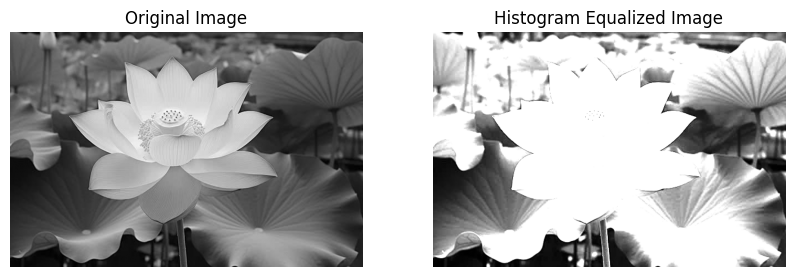

In [27]:
# 8. Display the histogram equalized image
plt.figure(figsize=(10, 5))

# Display Original Image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')  # Hide axis numbers

# Display Equalized Image
plt.subplot(1, 2, 2)
plt.imshow(img_equalized , cmap='gray' )
plt.title('Histogram Equalized Image')
plt.axis('off')

plt.show()